# Итоговый проект

Данный модуль является заключительным для обязательных глав курса по SageMath. В рамках итогового проекта студент должен будет выполнить одну объемную задачу, покрывающую в той или иной степени все рассмотренные темы: от символьных вычислений и графиков, до основ линейной алгебры в Sage. Прошу обратить внимание, что Ваша работа будет проверяться такими же студентами, как и Вы, поэтому:
1. Грамотно оформляйте свою работу, пишите подробные комментарии, что вы делаете (либо же вставляйте в Ваше копию блокнота блоки Markdown, содержащие пояснения). 
2. Работа будет считаться выполненной только после того, как автор работы проверит не менее 3-х работ других студентов.

## Условие задания

В данной работе Вам будет необходимо привести к каноническому виду уравнения кривой и поверхности второго порядка по данному Вам варианту. Просьба, после этого блока вставить блок Markdown с указанием номера Вашего варианта. План работы над заданием:
1. Задать уравнения кривой второго порядка и поверхности второго порядка в символьном виде.
2. Построить графики заданной кривой и поверхности. Обратить внимание на расположение координаты 0, 0.
3. Привести аналитически (например, методом ортогонального преобразования) квадратичные формы, описывающие кривую и поверхность второго порядка к каноническому виду.
4. Построить графики приведенных к каноническому виду кривой и поверхности второго порядка. 
5. Сделать выводы, оформить блокнот.

#### Вариант: 5

Задана следующая квадратичная форма:
    $$ y^2-x^2/10-2xy-x-y=0 $$
Также задана следующая поверхность:
    $$ 2x^2+11y^2+11z^2+12xy+12xz+24yz=0 $$

##### Задать уравнения кривой второго порядка и поверхности второго порядка в символьном виде.

In [9]:
# инициализация
var('y z')

# уравнение кривой
graph_eq = y^2 - (x^2)/10 - 2*x*y - x-y == 0
# уравнение поверхности
area_eq = 2*x^2 + 11*y^2 + 11*z^2 + 12*x*y + 12*x*z + 24*y*z == 0

Теперь построим график заданной кривой:

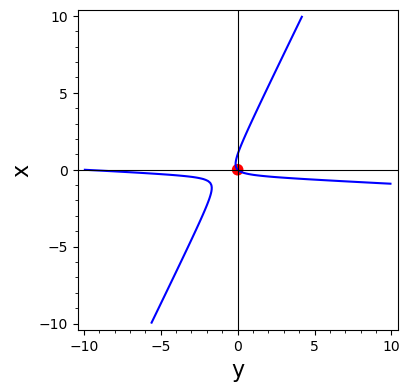

In [10]:
# график кривой
x_rng = (-10, 10)
y_rng = (-10, 10)
graph = implicit_plot(graph_eq, x_rng, y_rng)
# добавляем отображение точки (0, 0)
graph += point((0, 0), color='red', size=70)
graph.show(axes=True, axes_labels=['y', 'x'])
# убираем точку (0, 0)
graph = implicit_plot(graph_eq, x_rng, y_rng)

Теперь найдем асимптоты (при наличии) и также добавим их на график:

**Алгоритм построения ассимптот.**

Ассимптота - прямая, обладающая тем свойством, что расстояние от точки: $(x, f(x))$ графика функции до этой прямой стремится к нулю при неограниченном удалении точки графика от начала координат. Задается уравнением вида:
$$ y = kx +  b $$
У функции может не быть ассимптот, а может и быть бесконечно много, тут так сразу не угадаешь. Благо, жизнь нам предлагает алгоритм по нахождению ассимптот функции, при этом этот же алгоритм позволяет доказать, что ассимптот не существует.

Ассимптота существует, если оба предела: $$\lim_{x\to \infty} \frac{f(x)}{x}=k$$  и  $$\lim_{x\to \infty} {f(x)-kx}=b$$ существуют и не равны бесконечности.

Но жестокая судьба так и шепчет, что не все так просто. И дейтсвительно, ведь функция, заданная выше, задана неявно, а значит, для нахождения ее ассимптот нужны более общие правила.

Имеем что-то вроде: $$F(x,y)=0 $$  Пусть асимптота описывается уравнением $y=kx+b$, тогда, подставляя это выражение для $y$ в уравнение кривой, получаем алгебраическое уравнение относительно одной переменной $x$:
$${A_0}{x^n} + {A_1}{x^{n - 1}} +  \ldots  + {A_{n - 1}}x + {A_n} = 0$$

где коэффициенты $A_i$зависят от параметров асимптоты $k$ и $b$ (причем коэффициент $A_0$ зависит лишь от $k$). Значения $k$ и $b$ определяются из условия:
$$\left\{ \begin{array}{l}
{A_0}\left( k \right) = 0\\
{A_1}\left( {k,b} \right) = 0
\end{array} \right..$$

Для нахождения вертикальной асимптоты нужно подставить ее уравнение $x=a$ в уравнение кривой и преобразовать последнее к виду:

$${B_0}{y^n} + {B_1}{y^{n - 1}} +  \ldots  + {B_{n - 1}}y + {B_n} = 0$$

Необходимым условием существования вертикальной асимптоты является отсутствие в последнем уравнении старшего члена ${B_0}{y^n}$ Значение параметра $a$ определяется из условия:
$${B_1}\left( a \right) = 0$$

Приведенные формулы для асимптот неявно заданных кривых справедливы, если кривая не имеет особых точек на бесконечности.

Подставим $ y = kx+b$ в уравнение и приведем подобные:

In [11]:
var('k b')

# делаем подстановку
polynom_kb = graph_eq.substitute(y=k*x+b)
print(f"1) {polynom_kb}")

# раскрываем скобки
polynom_kb = polynom_kb.expand()
print(f"2) {polynom_kb}")

# приводим подобные
polynom_kb = polynom_kb.left().collect(x) == 0
print(f"3) {polynom_kb}")

1) (k*x + b)^2 - 2*(k*x + b)*x - k*x - 1/10*x^2 - b - x == 0
2) k^2*x^2 + 2*b*k*x - 2*k*x^2 + b^2 - 2*b*x - k*x - 1/10*x^2 - b - x == 0
3) 1/10*(10*k^2 - 20*k - 1)*x^2 + b^2 + (2*b*k - 2*b - k - 1)*x - b == 0


Далее возьмем коэфициенты при двух старших степенях х.

In [12]:
# получаем коэффициенты
x2_coeff = polynom_kb.left().coefficient(x^2)
x1_coeff = polynom_kb.left().coefficient(x)
print(f"x^2 coeff = {x2_coeff}")
print(f"x coeff = {x1_coeff}")

x^2 coeff = k^2 - 2*k - 1/10
x coeff = 2*b*k - 2*b - k - 1


И, наконец, решим систему из полученных уравнений, найдя k и b:

In [13]:
eq2 = x2_coeff == 0
eq1 = x1_coeff == 0
# решение системы
solve_eq = solve((eq2, eq1), k, b)
print(f"Solve 1: k = {solve_eq[0][0].right()}, b = {solve_eq[0][1].right()}")
print(f"Solve 2: k = {solve_eq[1][0].right()}, b = {solve_eq[1][1].right()}")

Solve 1: k = -1/10*sqrt(110) + 1, b = -1/11*sqrt(110) + 1/2
Solve 2: k = 1/10*sqrt(110) + 1, b = 1/11*sqrt(110) + 1/2


Теперь остается добавить на график обе ассимптоты:

asympt1: y = -1/10*x*(sqrt(110) - 10) - 1/11*sqrt(110) + 1/2,
asympt2: y = 1/10*x*(sqrt(110) + 10) + 1/11*sqrt(110) + 1/2


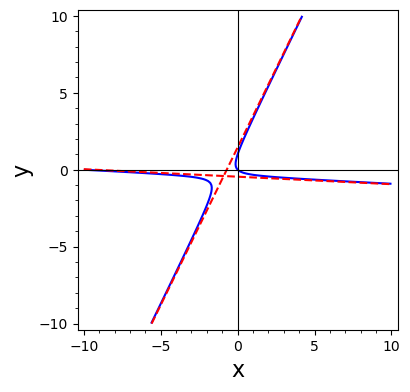

In [15]:
# уравнения ассимптот
asympt1 = solve_eq[0][0].right() * x + solve_eq[0][1].right()
asympt2 = solve_eq[1][0].right() * x + solve_eq[1][1].right()

print(f"asympt1: y = {asympt1},")
print(f"asympt2: y = {asympt2}")

# добавим на график ассимптоты
graph += implicit_plot(y == asympt1, x_rng, y_rng, color="red", linestyle="--")
graph += implicit_plot(y == asympt2, x_rng, y_rng, color="red", linestyle="--")
graph.show(axes=True, axes_labels=["x", "y"])

1. Теория по построению асимптот неявно заданной функции
2. Задание на нахождение производной неявно заданной функции
3. Построить график производной функции, которая задает кривую 2-го порядка (синим цветом выделить промежутки убывания функции, красным - возрастания).
4. Заставить найти точку пересечения асимптот

Осталось только найти точку пересечения ассимптот:

In [16]:
#для поиска точки пересечения необходимо решить уравнение
x_point = solve(asympt1 == asympt2, x)
print(f"Точка пересечения ассимптот: ({x_point[0].right().n(16)}; {asympt1(x_point[0].right()).n(16)})")

Точка пересечения ассимптот: (-0.9091; -0.4091)


Теперь построим график поверхности второго порядка:

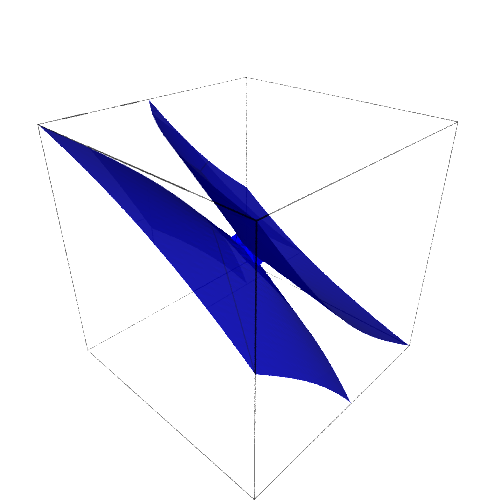

In [50]:
rng = (-10, 10)

P3d = implicit_plot3d(area_eq, rng, rng, rng, adaptive=True, color='blue', opacity='0.95')
P3d.show(axis=True, axis_labels=['x', 'y', 'z'], viewer='tachyon')

Для удобной работы с уравнением кривой второго порядка, само уравнения надо представить в виде суммы некоей квадратичной формы и линейного функционала. В данном случае часть уравнения, являющаяся КФ имеет вид:
                            $$ y^2-x^2/10-2xy $$
Линейная часть выглядит так:
 $$ -x-y $$
Введем теперь вектор $v$:
$$ v = v_e = (x, y)^T $$
Тогда если обозначить матрицу квадратичной формы за $Q$, а матрицу линейного функционала за $L$, то наше уравнение примет следующий вид:
$$ v^T * Q * v + L*v = 0$$

Ваша текущая задача заключается в том, чтобы составить матрицы Q и L:
(Замечание: в SageMath существует объект QuadraticForm, который позволяет работать не с абстрактными матрицами, а с матрицами именно квадратичной формы. Решение, реализованное не по шаблону, с использованием QuadraticForm также будет приниматься, но рассматриваться в ноутбуке не будет).

In [17]:
graph_Q = matrix([[-1/10, -1],
                     [-1,  1]])
graph_L = matrix([-1, -1])

area_Q = matrix([[2,  6,  6],
                 [6, 11, 12],
                 [6, 12, 11]])
area_L = matrix([0, 0, 0])

Теперь нам нужно диагонализировать матрицу КФ: для этого нам нужно перейти из стандартного базиса к базису из собственных векторов. Следовательно, следует найти собственные числа и векторы матрицы $Q$:

In [31]:
eigen_info = graph_Q.eigenvectors_right()
#Вывод полученных значений для кривой
qraph_eig_inf = []
print(f"Собственные числа и вектора для КФ кривой:")
for val, vecs, _ in eigen_info:
    for vec in vecs:
        print(f"Число: {val}  Вектор: {vec}")
        qraph_eig_inf.append((val, vec))
print()


eigen_info = area_Q.eigenvectors_right()
# выводим полученных значений для поверхности второго порядка
area_eig_inf = []
print(f"Собственные числа и вектора для КФ поверхности:")
for val, vecs, _ in eigen_info:
    for vec in vecs:
        print(f"Число: {val}  Вектор: {vec}")
        area_eig_inf.append((val, vec))

Собственные числа и вектора для КФ кривой:
Число: -0.6912712210513327?  Вектор: (1, 0.5912712210513327?)
Число: 1.591271221051333?  Вектор: (1, -1.691271221051333?)

Собственные числа и вектора для КФ поверхности:
Число: 26  Вектор: (1, 2, 2)
Число: -1  Вектор: (1, 0, -1/2)
Число: -1  Вектор: (0, 1, -1)


Получив собственные векторы матрицы можно задать матрицу перехода от стандартного базиса в $R^2$ к базису из собственных векторов. Запишите матрицу перехода, составив ее из собственных векторов и при необходимости избавившись от дробей в векторах (вектора следует нормировать):

In [33]:
# Нахождение матрицы перехода для кривой
first_vec, second_vec = qraph_eig_inf[0][1], qraph_eig_inf[1][1]
first_vec /= first_vec.norm()
second_vec /= second_vec.norm()
transition_matrix_graph = matrix([[first_vec[0], second_vec[0]],
                                  [first_vec[1], second_vec[1]]])
print("Матрица перехода для кривой: \n")
print(transition_matrix_graph)
print()

# Нахождение матрицы перехода для поверхности
first_vec, second_vec = area_eig_inf[0][1], area_eig_inf[1][1]
third_vec = area_eig_inf[2][1]

first_vec /= first_vec.norm()
second_vec /= second_vec.norm()
third_vec /= third_vec.norm()

transition_matrix_area = matrix([[first_vec[0], second_vec[0], third_vec[0]], 
                                    [first_vec[1], second_vec[1], third_vec[1]],
                                    [first_vec[2], second_vec[2], third_vec[2]]])
print("Матрица перехода для поверхности: \n")
print(transition_matrix_area)

Матрица перехода для кривой: 

[ 0.8607899714135138?  0.5089603374664101?]
[ 0.5089603374664101? -0.8607899714135138?]

Матрица перехода для поверхности: 

[         1/3  2/5*sqrt(5)            0]
[         2/3            0  1/2*sqrt(2)]
[         2/3 -1/5*sqrt(5) -1/2*sqrt(2)]


Теперь проверьте равенство норм обоих собственных векторов (обратите внимение, здесь используется стандартная евклидова, т.е. вторая, норма):

In [34]:
# # для округления используется метод n()
print("Нормы векторов кривой: ")
print(transition_matrix_graph[0:2, 0].norm().n(), transition_matrix_graph[0:2, 1].norm().n())
print("Нормы векторов поверхности: ")
print(transition_matrix_area[0:3, 0].norm().n(), transition_matrix_area[0:3, 1].norm().n(), \
      transition_matrix_area[0:3, 2].norm().n())

Нормы векторов кривой: 
1.00000000000000 1.00000000000000
Нормы векторов поверхности: 
1.00000000000000 1.00000000000000 1.00000000000000


Перепишем теперь матрицу $Q$ в новом базисe. Формула для матрицы оператора в новом базисе: $A_{new}=C^{-1}*A*C$, где $C$ - матрица перехода

In [35]:
graph_q_new_basis = transition_matrix_graph.inverse() * graph_Q * transition_matrix_graph
area_q_new_basis = transition_matrix_area.inverse() * area_Q * transition_matrix_area

print("Матрица Q кривой в новом базисе:")
print(graph_q_new_basis.n())
print()
print("Матрица Q поверхности в новом базисе:")
print(area_q_new_basis.n())

Матрица Q кривой в новом базисе:
[   -0.691271221051333 -2.71050543121376e-20]
[ 5.42101086242752e-20      1.59127122105133]

Матрица Q поверхности в новом базисе:
[ 26.0000000000000 0.000000000000000 0.000000000000000]
[0.000000000000000 -1.00000000000000 0.000000000000000]
[0.000000000000000 0.000000000000000 -1.00000000000000]


Теперь подставим полученные переменные в наше исходное уравнение:

In [36]:
v = matrix([[x], [y]])

graph_new = (v.T*graph_q_new_basis*v + graph_L*v).expand()[0][0] == 0

v = matrix([[x], [y], [z]])
area_new = (v.T*area_q_new_basis*v + area_L*v).expand()[0][0] == 0

print("Уравнение кривой в новом базисе: \n", graph_new)
print("\nУравнение поверхности в новом базисе: \n",area_new)

Уравнение кривой в новом базисе: 
 -0.6912712210513327?*x^2 + 1.591271221051333?*y^2 - x - y == 0

Уравнение поверхности в новом базисе: 
 26*x^2 - y^2 - z^2 == 0


Для проверки решения снова построим график:

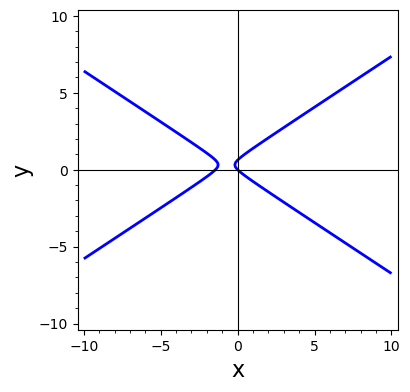

In [39]:
P = implicit_plot(graph_new, x_rng, y_rng, color='blue', linewidth=2) 
P.show(axes=True, axes_labels=['x', 'y'])

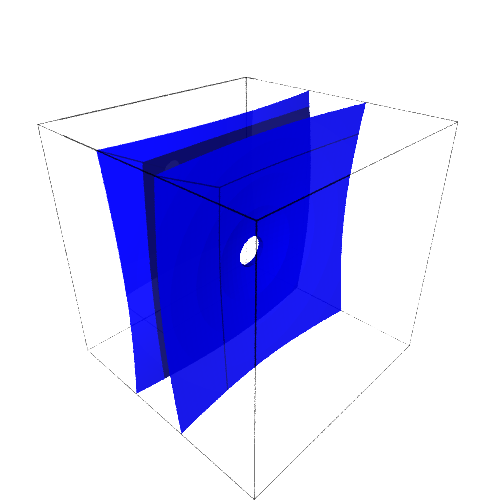

In [51]:
P3d2 = implicit_plot3d(area_new, rng, rng, rng, adaptive=True, color='blue', opacity='0.95')
P3d2.show(axis=True, axis_labels=['x', 'y', 'z'], viewer='tachyon')

Если все было сделано верно, то мы должны были добиться поворота графика таким образом, чтобы он стал параллелен одной из осей координат. Остались только последние штрихи: отцентрировать график.

In [40]:
var('k b')

print("Equation after")

eq_y_subs = graph_new.substitute(y=k*x+b)
print(f"1) substitution: {eq_y_subs}")

eq_y_subs = eq_y_subs.expand()
print(f"2) 1 + expanding: {eq_y_subs}")

# it seems like collect method does not support equations, so we use it on left side of 
# equation and then append right side
eq_y_subs = eq_y_subs.left().collect(x) == eq_y_subs.right()
print(f"3) 2 + collecting x coeffitients {eq_y_subs}")

print(f"\nFinal form: \n{eq_y_subs}")

Equation after
1) substitution: 1.591271221051333?*(k*x + b)^2 - k*x - 0.6912712210513327?*x^2 - b - x == 0
2) 1 + expanding: 1.591271221051333?*k^2*x^2 + 3.182542442102666?*b*k*x + 1.591271221051333?*b^2 - k*x - 0.6912712210513327?*x^2 - b - x == 0
3) 2 + collecting x coeffitients (1.591271221051333?*k^2 - 0.6912712210513327?)*x^2 + 1.591271221051333?*b^2 + (3.182542442102666?*b*k - k - 1)*x - b == 0

Final form: 
(1.591271221051333?*k^2 - 0.6912712210513327?)*x^2 + 1.591271221051333?*b^2 + (3.182542442102666?*b*k - k - 1)*x - b == 0


Далее возьмем коэфициенты при двух старших степенях х

In [59]:
x_to_2_coef  = eq_y_subs.left().coefficient(x^2)+0.0000000000000000001+0.0000000000000000001*k^2
x_coef       = eq_y_subs.left().coefficient(x)+0.0000000000000000001*b*k
print(f"x^2:  {x_to_2_coef}")
print(f"x  : {x_coef}")

x^2:  1.59127122105133*k^2 - 0.691271221051333
x  : 3.18254244210267*b*k - k - 1


Решим систему из полученных уравнений, найдя k и b

In [63]:
solutions = solve([x_to_2_coef == 0,  x_coef == 0], k, b)

for sol_num, solution in enumerate(solutions, start=1):
    print(f"Sol #{sol_num}: {solution[0].left()} = {solution[0].right()}, "
          f"{solution[1].left()} = {solution[1].right()}")

Sol #1: k = -7/1134706432992946*sqrt(11414981772316511494269009846), b = -13212352/2961038709561370494147*sqrt(11414981772316511494269009846) + 13212352/42048871
Sol #2: k = 7/1134706432992946*sqrt(11414981772316511494269009846), b = 13212352/2961038709561370494147*sqrt(11414981772316511494269009846) + 13212352/42048871


Составим уравнения асимптот:

In [65]:
asymptotes_equations = [solution[0].right()*x + solution[1].right()
                            for solution in solutions]

for asymp_num, asymp in enumerate(asymptotes_equations, start=1):
    print(f"Asympt #{asymp_num}: y = {asymp}")

Asympt #1: y = -7/1134706432992946*sqrt(11414981772316511494269009846)*x - 13212352/2961038709561370494147*sqrt(11414981772316511494269009846) + 13212352/42048871
Asympt #2: y = 7/1134706432992946*sqrt(11414981772316511494269009846)*x + 13212352/2961038709561370494147*sqrt(11414981772316511494269009846) + 13212352/42048871


In [66]:
# приравниваем уравнения двух асимптот, получаем координату по x
inters_x = solve(asymptotes_equations[0] == asymptotes_equations[1], x)[0].right()
# подставляем в уравнение любой из асимптот найденный х, получаем у
inters_y = asymptotes_equations[0]

# .n() позволяет получить приближенный ответ в виде числа
print(f"Точка пересечения: ({inters_x.n():.5f}, {inters_y(inters_x).n():.5f})")

Точка пересечения: (-0.72331, 0.31421)


Теперь путем параллельного переноса отцентрируем график гиперболы:

**Замечание.** Сдвигать надо на значение х и у, полученные полученные в предыдущем шаге(точки пересечения ассимптот функции после поворота)

In [67]:
graph_centered = graph_new.substitute(x=x+inters_x.n(), y=y+inters_y(inters_x).n())
print(f"Нецентрированное: {graph_new}")
print(f"Подставляем: {graph_centered}")
print(f"Раскрываем: {graph_centered.expand()}")

Нецентрированное: -0.6912712210513327?*x^2 + 1.591271221051333?*y^2 - x - y == 0
Подставляем: -0.6912712210513327?*(x - 0.723305100477878)^2 + 1.591271221051333?*(y + 0.314214191386970)^2 - x - y + 0.409090909090908 == 0
Раскрываем: -0.6912712210513327?*x^2 + 1.591271221051333?*y^2 - (5.55111512312578e-16)*x + (8.88178419700125e-16)*y + 0.204545454545455 == 0


Построим график кривой второго порядка в новых "отцентрированных" координатах:

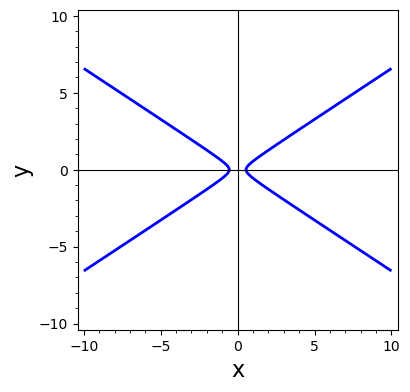

In [70]:
P = implicit_plot(graph_centered, x_rng, y_rng, color='blue', linewidth=2) 
P.show(axes=True, axes_labels=['x', 'y'])

И повторно выведем отцентрированный график поверхности второго порядка (он был отцентрирован изначально):

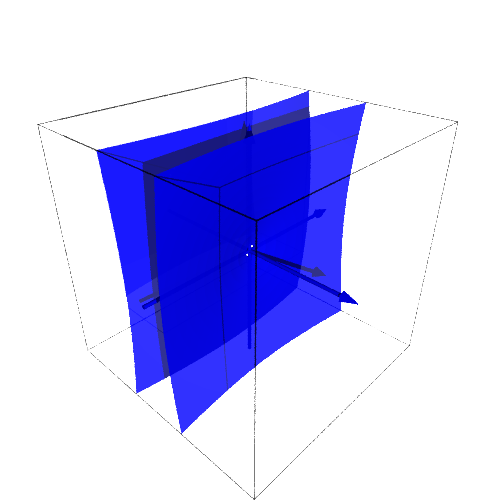

In [73]:
P = implicit_plot3d(area_new, rng, rng, rng, adaptive=True, plot_points=[100, 100, 100],
                    color='blue', opacity='0.9')
P.show(axes=True, viewer='tachyon')

# Вывод

В ходе практической работы были проведены различные действия с кривой второго порядка и поверхностью второго порядка: построение графика, поиск асимптот, приведение к каноническому виду. Для кривой второго порядка были найдены асимптоты, первый раз - в ходе построения графика функции, второй раз - во время центирования графика.  
В итоге, были получены 3 графика для кривой: изначальный, с переходом в другие координаты, где график кривой стал параллелен одной из координат, с переходом в новые координаты, где график кривой параллелен одной из координат и при этом отцентрирован. Для поверхности были получены 2 графика: 1) изначальный, 2) с переходом в другие координаты, где график поверхности параллелен одной из координат, а также отцентрирован.